In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Example of using numpy, pandas, and matplotlib

## Creating dataframe

In [10]:
df = pd.DataFrame(columns=['A', 'B', 'C'])

for col in df.columns:
    df[col] = np.random.lognormal(size=1000)

df['D'] = df['A'] * df['B']

df.head()

,A,B,C,D
0,1.533764,0.940863,0.304135,1.443061
1,0.230070,3.608464,1.776701,0.830199
2,2.711973,2.505201,1.443842,6.794039
3,1.564309,1.548421,1.616636,2.422209
4,1.289788,0.535207,0.309869,0.690303


## Taking the log, plotting the results

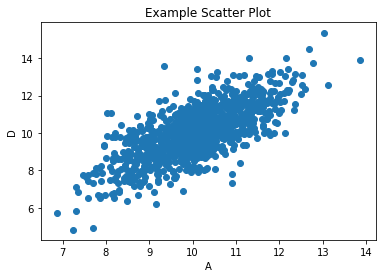

In [11]:
# Try out square rooting D

df_mod = np.log(df) + 10
#df_mod['D'] = np.sqrt(df_mod['D'])

plt.scatter(df_mod['A'], df_mod['D'])
plt.xlabel('A')
plt.ylabel('D')
plt.title('Example Scatter Plot')
plt.show()

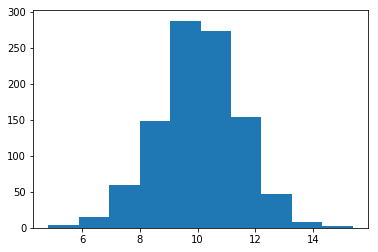

In [12]:
plt.hist(df_mod['D'])
plt.show()

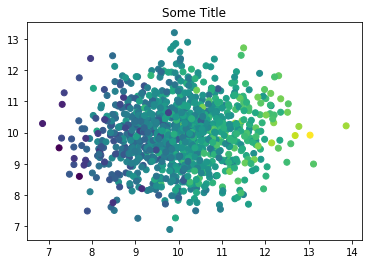

In [13]:
plt.scatter(df_mod['A'], df_mod['C'], c=df_mod['D'])
plt.title('Some Title')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_mod[['A', 'C']], df_mod['D'])

## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

line = LinearRegression()

line.fit(X_train, Y_train)

print('Train score: ', line.score(X_train, Y_train))

print('Test score: ', line.score(X_test, Y_test))


Train score:  0.49978394162668294
Test score:  0.5566923837608542


In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)

lasso.fit(X_train, Y_train)

print('Train score: ', lasso.score(X_train, Y_train))

print('Test score: ', lasso.score(X_test, Y_test))

Train score:  0.49968777905246264
Test score:  0.5562871089307012
